In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_pickle('./finefood_dataset_cleaned.pkl')
df.head()

,score,summary,text,text_cleaned,summary_cleaned,word_counts_summary,word_counts_text,word_counts_summary_cleaned,word_counts_text_cleaned
0,5.0,good quality dog food,i have bought several of the vitality canned d...,bought sever vital can dog food product found ...,good qualiti dog food,4,48,4,23
1,1.0,not as advertised,product arrived labeled as jumbo salted peanut...,product arriv label jumbo salt peanut peanut a...,advertis,3,31,1,18
2,4.0,"""delight"" says it all",this is a confection that has been around a fe...,confect around centuri light pillowi citrus ge...,delight say,4,94,2,39
3,2.0,cough medicine,if you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...,cough medicin,2,41,2,18
4,5.0,great taffy,great taffy at a great price. there was a wid...,great taffi great price wide assort yummi taff...,great taffi,2,27,2,13


In [3]:
df.shape

(395006, 9)

In [4]:
df = df.sample(n=50000, random_state = 123)
df.shape

(50000, 9)

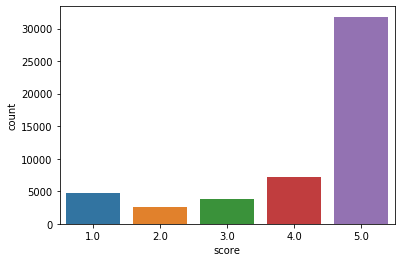

In [5]:
sns.countplot(df.score)

In [6]:
indexes = df.index[df['score'] == '5.0'].tolist()
drop_indices = np.random.choice(indexes, 24000, replace=False)
df = df.drop(drop_indices)
df.shape

(26000, 9)

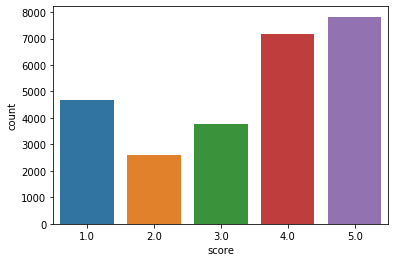

In [7]:
sns.countplot(df.score)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['text_cleaned'])

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['score'], random_state = 0)
print("Shapes X_train, X_test, y_train, y_test: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shapes X_train, X_test, y_train, y_test:  (19500, 21936) (6500, 21936) (19500,) (6500,)


In [9]:
from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

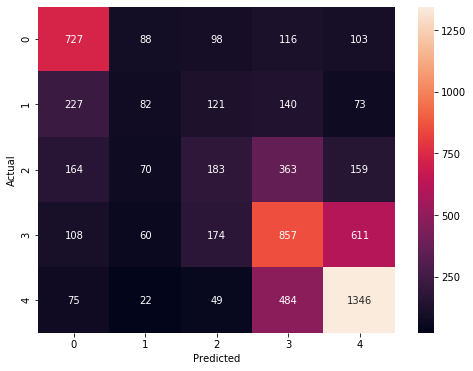

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))

Accuracy on test set: 49.154%
Precision on test set: 0.426
Recall on test set: 0.424
F1-Score on test set: 0.417


In [12]:
print(model.predict(count_vect.transform(['Very tasty food'])))

['5.0']


In [13]:
print(model.predict(count_vect.transform(['have never had better'])))

['4.0']


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df['text_cleaned']).toarray()
labels = df['score']
features.shape

(26000, 33024)

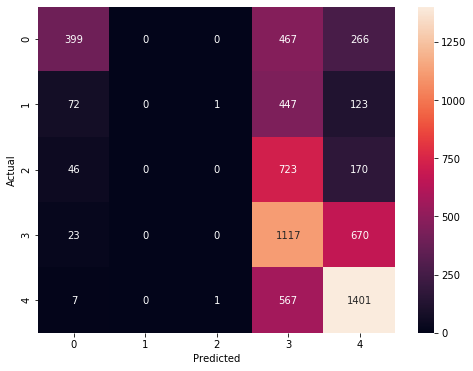

Accuracy on test set: 44.877%
Precision on test set: 0.320
Recall on test set: 0.336
F1-Score on test set: 0.304


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['text_cleaned'], df['score'], random_state = 0)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

y_pred = clf.predict(count_vect.transform(X_test))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))